# CNN으로 패션아이템 구분하기

In [8]:
# 패키지 수입
import matplotlib.pyplot as plt
import numpy as np
from time import time

from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.utils import np_utils

from keras.layers import Dense
from keras.layers import Flatten, Conv2D, MaxPool2D
from keras.layers import InputLayer

In [9]:
# 하이퍼 파라미터

MY_EPOCH = 10   # 반복 학습 수
MY_BATCH = 500  # 매번 가져와서 계산하는 학습용 데이터

X_train 모양 : (60000, 28, 28)
Y_train 모양 : (60000,)
X_test 모양  : (10000, 28, 28)
Y_test 모양  : (10000,)
0번 학습용 이미지 라벨: 9


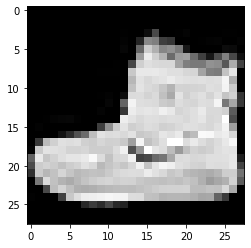

In [10]:
# 데이터 불러오기

(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

print('X_train 모양 :', X_train.shape)
print('Y_train 모양 :', Y_train.shape)
print('X_test 모양  :', X_test.shape)
print('Y_test 모양  :', Y_test.shape)

# display(X_train[0])
# 수치 데이터는 8-bit 화소 정수 [0,255]
plt.imshow(X_train[0],cmap='gray')
print('0번 학습용 이미지 라벨:', Y_train[0])


In [11]:
# 입렫 데이터 추가 처리
X_train = X_train / 255
# print(X_train[0])
# plt.imshow(X_train[0],cmap='gray')
X_test = X_test / 255

# 이미이 채널 정보 추가
# keras convolution (합성곱) 함수가 원해서
print('X_train  채널 추가 전 :',X_train.shape)
X_train = np.expand_dims(X_train,axis=3)
print('X_train  채널 추가 후 :',X_train.shape)
print('X_test   채널 추가 전 :',X_test.shape)
X_test = np.expand_dims(X_test,axis=3)
print('X_test   채널 추가 후 :',X_test.shape)

X_train  채널 추가 전 : (60000, 28, 28)
X_train  채널 추가 후 : (60000, 28, 28, 1)
X_test   채널 추가 전 : (10000, 28, 28)
X_test   채널 추가 후 : (10000, 28, 28, 1)


In [12]:
# 출력 데이터 (=라벨) 추가 처리 /  원핫
print('Y_train  원핫 인코딩 전:',Y_train[0])
Y_train = np_utils.to_categorical(Y_train, 10)
print('Y_train  원핫 인코딩 후:',Y_train[0])
print('Y_test   원핫 인코딩 전:',Y_test[0])
Y_test = np_utils.to_categorical(Y_test, 10)
print('Y_test   원핫 인코딩 후:',Y_test[0])


Y_train  원핫 인코딩 전: 9
Y_train  원핫 인코딩 후: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Y_test   원핫 인코딩 전: 9
Y_test   원핫 인코딩 후: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [13]:
# 최종 데이터 모양 확인

print('X_train 모양 :', X_train.shape)
print('Y_train 모양 :', Y_train.shape)
print('X_test 모양  :', X_test.shape)
print('Y_test 모양  :', Y_test.shape)

X_train 모양 : (60000, 28, 28, 1)
Y_train 모양 : (60000, 10)
X_test 모양  : (10000, 28, 28, 1)
Y_test 모양  : (10000, 10)


In [14]:
# 인공 신경망 구현 : CNN
model = Sequential()
model.add(InputLayer(input_shape=(28,28,1)))

# 첫번째 합성곱 블럭 추가
model.add(Conv2D(filters=32,
                kernel_size=2,
                padding='same',
                activation='relu'))
model.add(MaxPool2D(pool_size=2))

# 두번째 합성곱 블럭 추가
model.add(Conv2D(filters=64,
                kernel_size=2,
                padding='same',
                activation='relu'))
model.add(MaxPool2D(pool_size=2))

# 화소를 뉴런화
model.add(Flatten())

model.add(Dense(units=128,
                activation='relu'))

# 출력층
model.add(Dense(units=10,
                activation='softmax'))

# CNN 요약
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)              

In [15]:
# CNN 학습
# 1. 학습 환경 설정
model.compile(optimizer='adam',
                loss = 'categorical_crossentropy',
                metrics= ['acc'])

# 2. 반복 학습 진행
print('학습 시작!')
begin = time()
model.fit(X_train,
            Y_train,
            epochs=MY_EPOCH,
            batch_size = MY_BATCH,
            verbose=1)

end = time()
print('총 학습 시간 : ',end-begin)